In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [30]:
from sklearn.datasets import fetch_california_housing

In [31]:
housing = fetch_california_housing()

In [32]:
housing_df = pd.DataFrame(data = housing.data, columns = housing.feature_names)
housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [34]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
HousePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [35]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

In [36]:
housing_df.duplicated().sum()

0

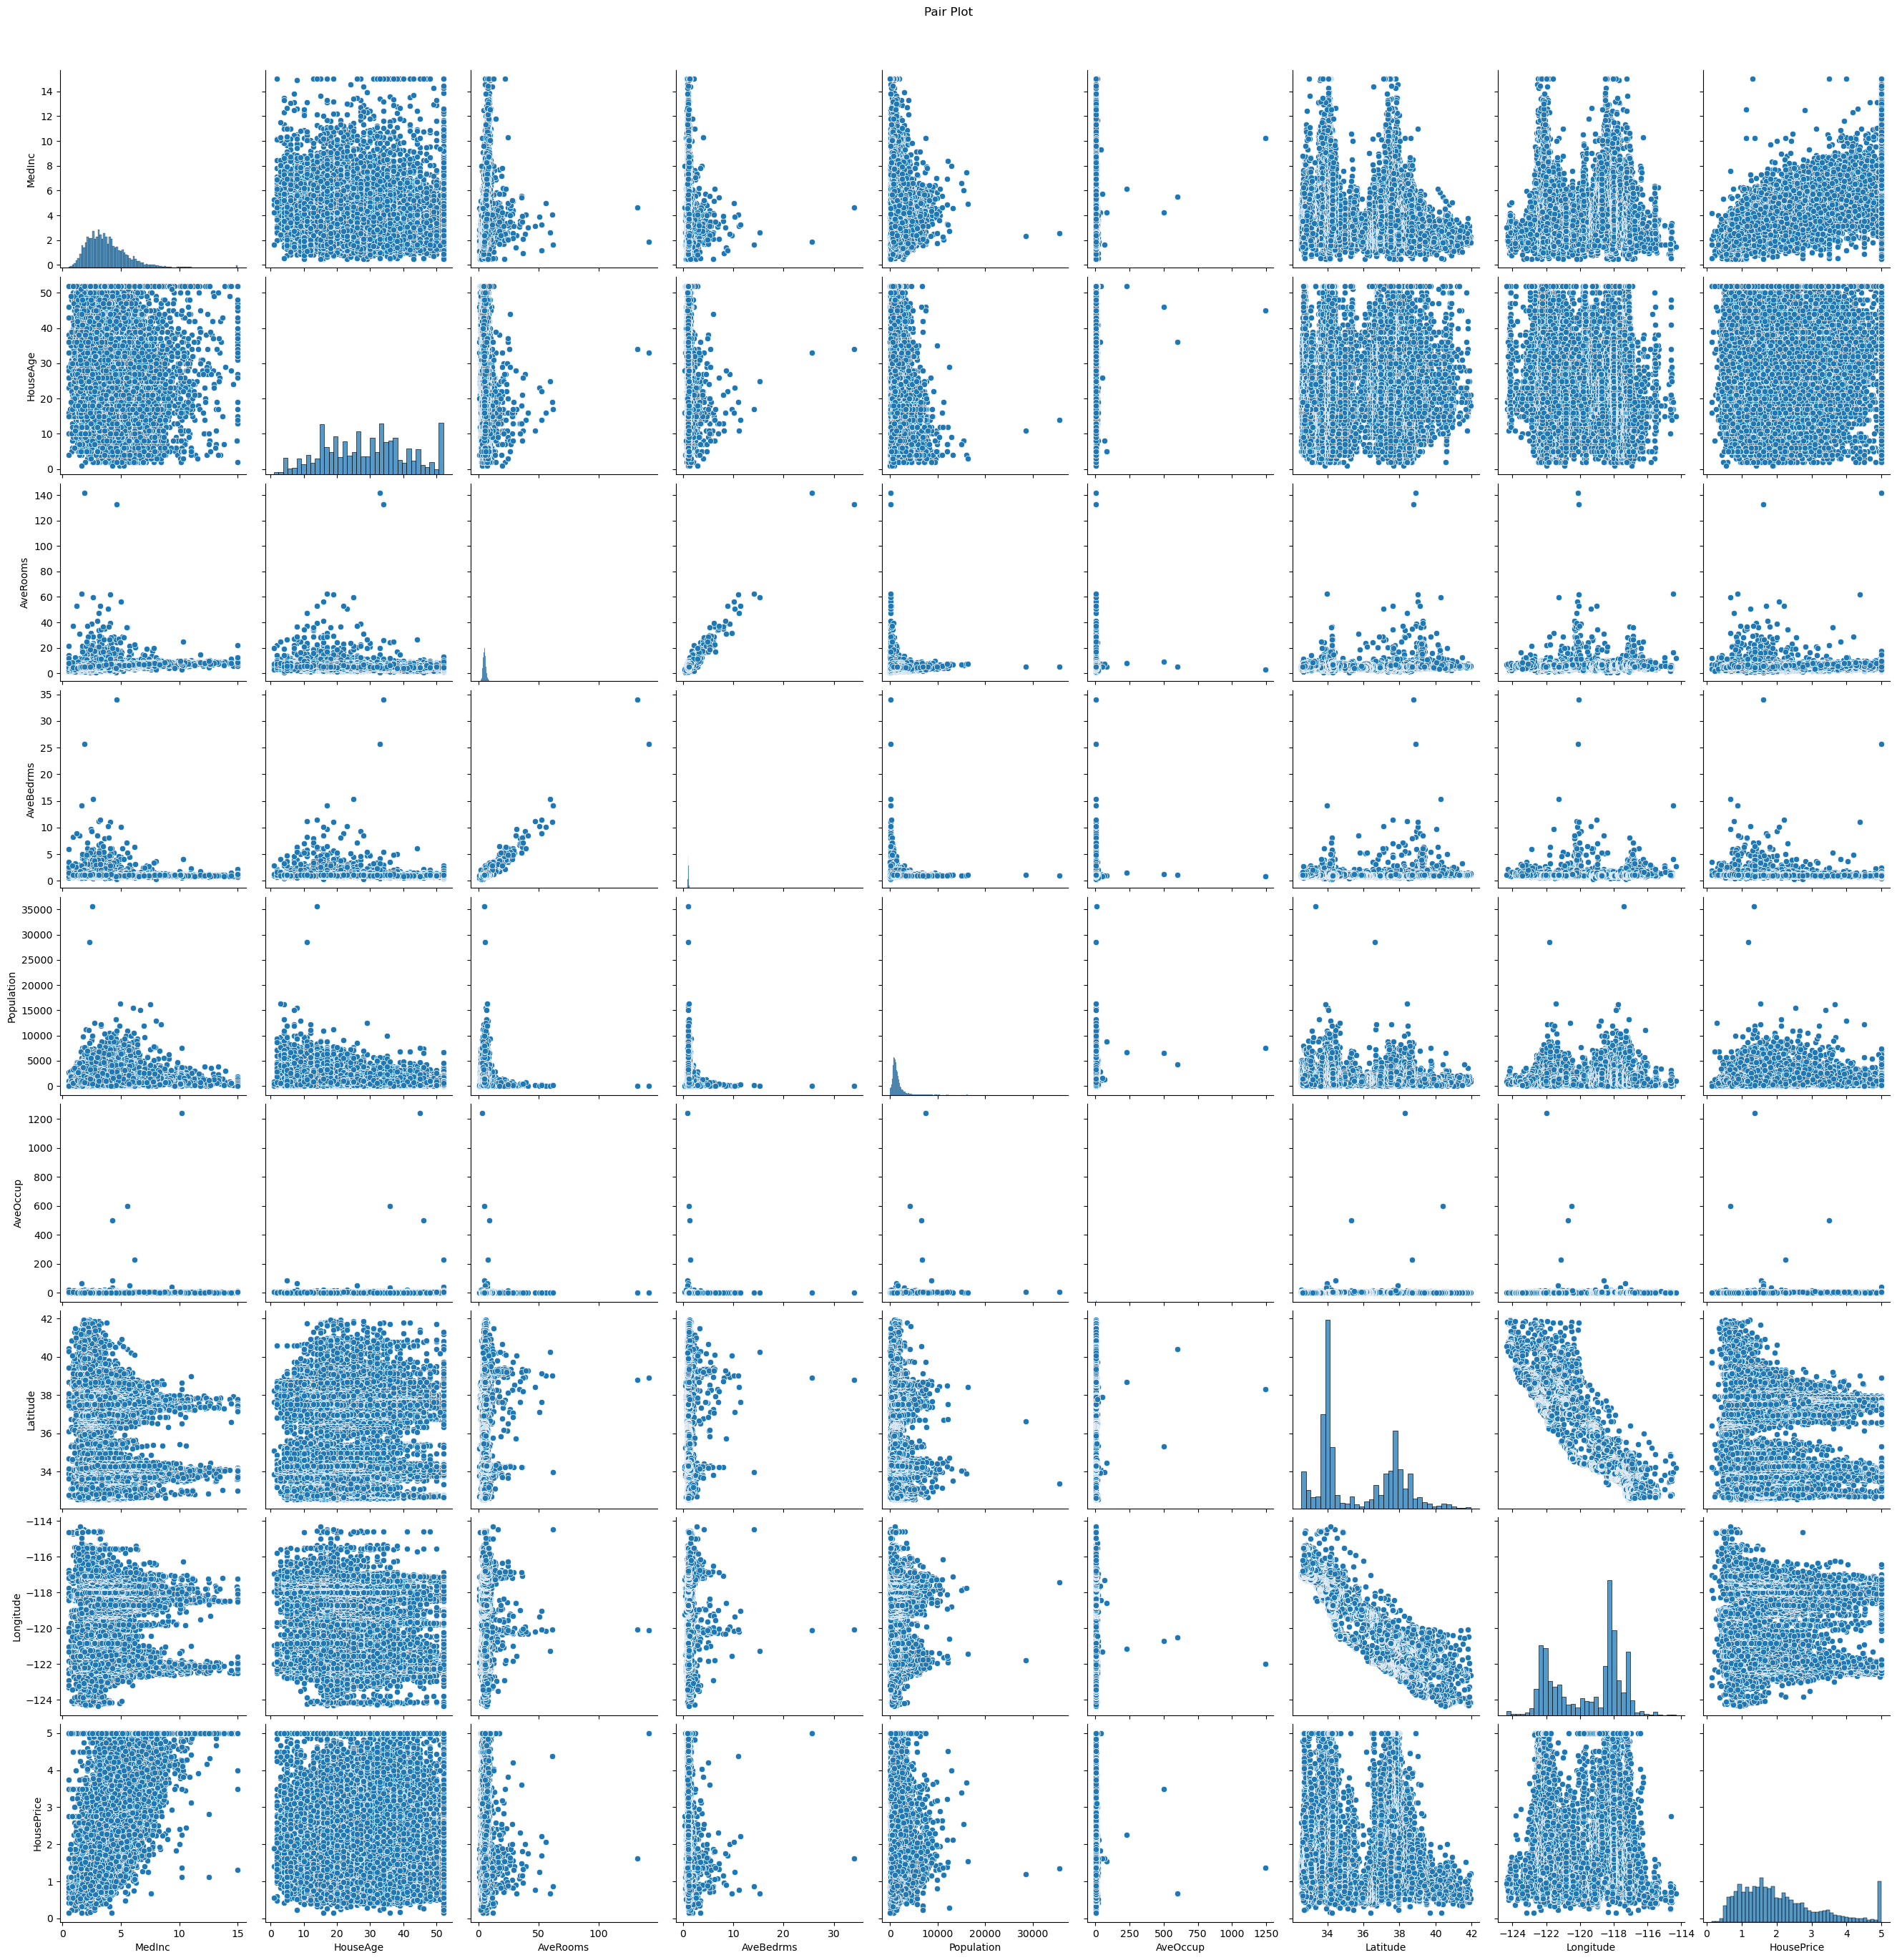

In [47]:
sns.pairplot(housing_df, height = 3, aspect = 1,)
plt.suptitle('Pair Plot',y =1.02)
plt.show()

In [ ]:
housing_df.plot(
    kind = 'scatter',
    x = 'Longitude',
    y = 'Latitude',
    alpha = 0.4,
    s = housing_df['Population']/100,
    label = 'Population',
    c = 'HousePrice',
    cmap = 'jet',
    colorbar = True,
    figsize = (10,8)
    
)

In [ ]:
corr = housing_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True , cmap = 'coolwarm',fmt = ".2f",linewidth = 0.5)

In [ ]:
corr["HousePrice"].abs().sort_values(ascending = False)

In [58]:
Medinc = housing_df['MedInc']
houseprice = housing_df["HousePrice"]


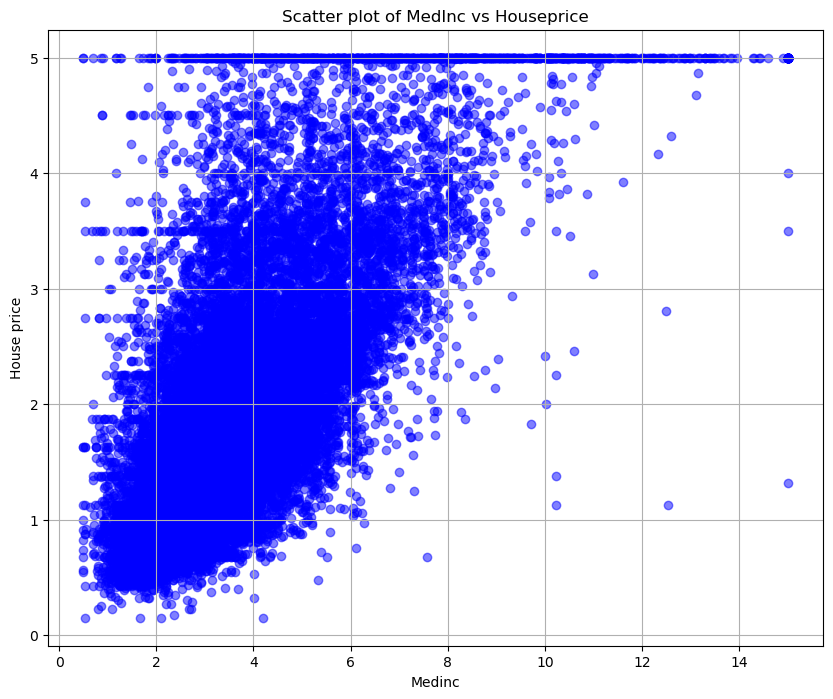

In [62]:
plt.figure(figsize = (10,8))
plt.scatter(Medinc,houseprice,alpha = .5, color = 'blue')
plt.title( 'Scatter plot of MedInc vs Houseprice')
plt.xlabel('Medinc')
plt.ylabel('House price')
plt.grid(True)
plt.show()


## VIF

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
housing_df_vif = housing_df.drop('HousePrice', axis = 1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric,errors = 'coerce')

In [75]:
vif_data = pd.DataFrame()

In [79]:
vif_data['Feature'] = housing_df_vif.columns

In [87]:
vif_data['VIF'] = [variance_inflation_factor(housing_df_vif.values,i) for i in range (len(housing_df_vif.columns))]

In [89]:
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [91]:
housing_df = housing_df.drop(['Latitude','Longitude'], axis =1)

In [93]:
cols_to_convert = ['MedInc','HouseAge',	'AveRooms',	'AveBedrms','Population','AveOccup']

In [99]:
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric,errors = 'coerce')

In [107]:
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'],errors = 'coerce')

In [116]:
X = sm.add_constant(housing_df.drop('HousePrice',axis =1))

In [119]:
y = housing_df['HousePrice']

In [121]:
model = sm.OLS(y,X).fit()

In [125]:
residuals = model.resid

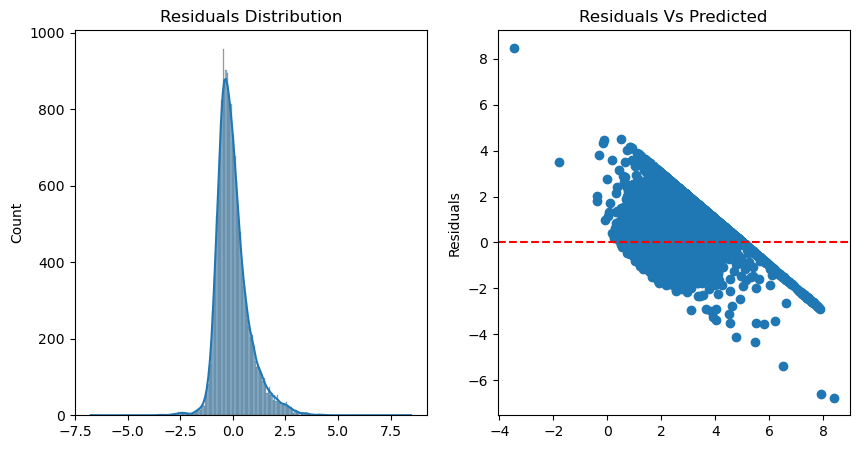

Model Coefficients const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [131]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(residuals , kde= True)
plt.title( 'Residuals Distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(X),residuals)
plt.axhline(y = 0, color ='red', linestyle = '--')
plt.title( 'Residuals Vs Predicted')
plt.ylabel('Residuals')
plt.show()

print('Model Coefficients' , model.params)


In [133]:
from sklearn.metrics import mean_squared_error,r2_score

In [135]:
predictions = model.predict(X)

In [137]:
print("R squared Score : " ,r2_score(y,predictions))
print('MSE :' ,mean_squared_error(y,predictions))

R squared Score :  0.5396977345638283
MSE : 0.6129156196698703


In [139]:
import matplotlib.pyplot as plt

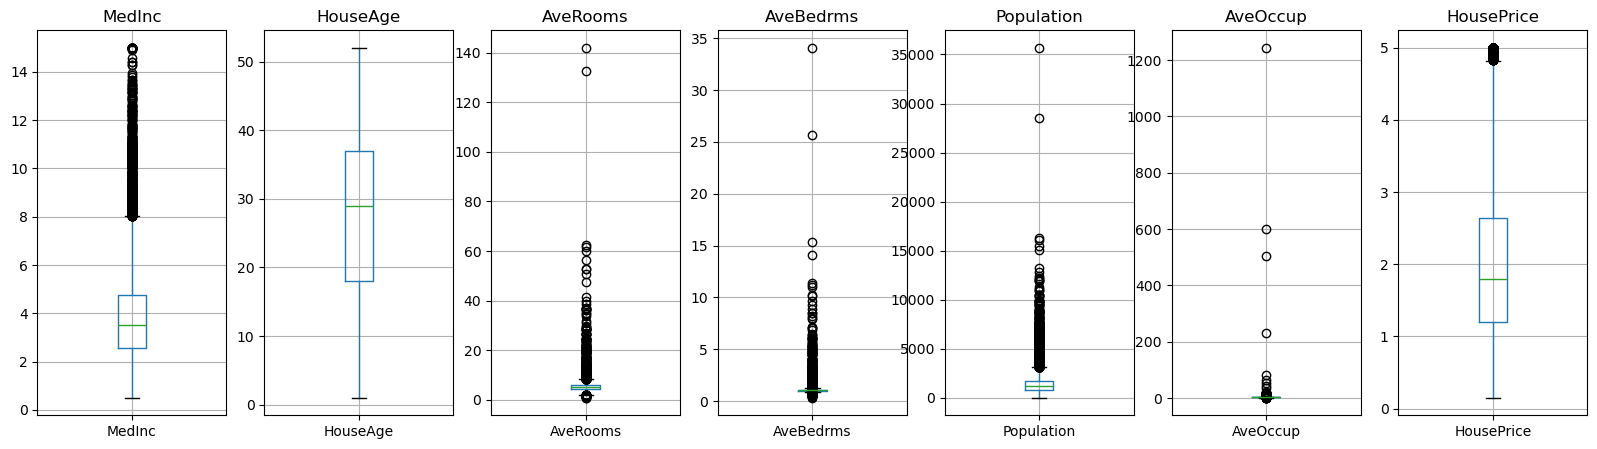

In [207]:
def plot_boxplot(df):
    
    fig,axes = plt.subplots(1,len(df.columns), figsize = (20,5))
    
    for i , column_name in enumerate(df.columns):
        df.boxplot(column = column_name ,  ax = axes[i])
        axes[i].set_title(column_name)
    plt.show()

plot_boxplot(housing_df)


In [215]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound 
                                                           else upper_bound if x > upper_bound else x)
    return df_no_outliers



In [217]:
housing_df_new = remove_outliers(housing_df)

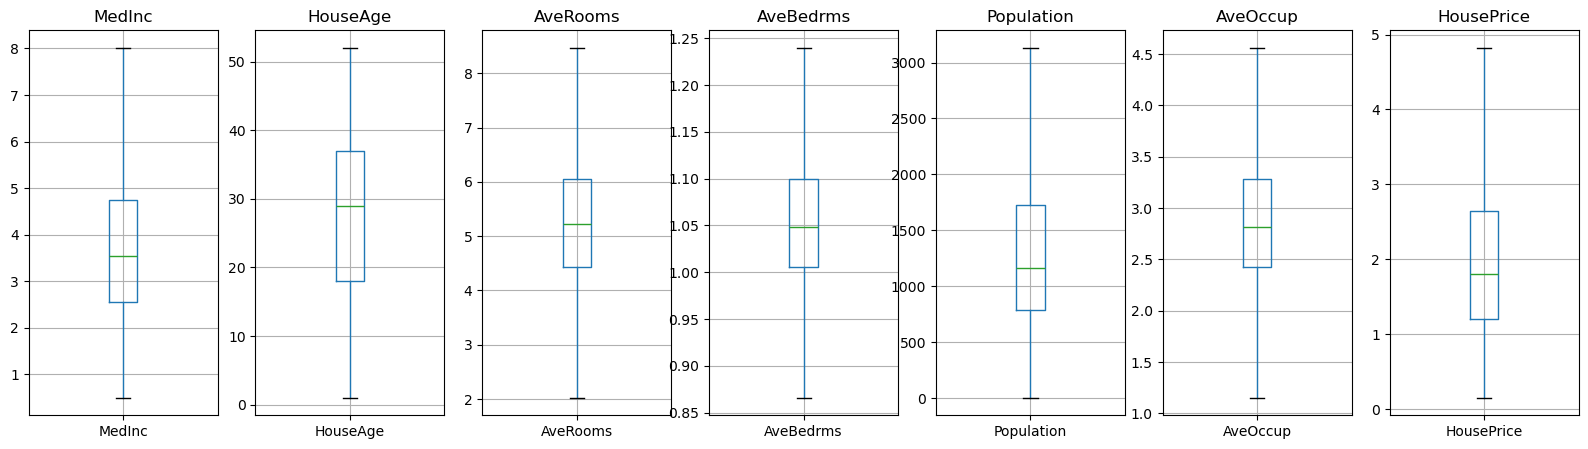

In [219]:
plot_boxplot(housing_df_new)

In [221]:
cols_to_convert = ['MedInc','HouseAge',	'AveRooms',	'AveBedrms','Population','AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric,errors = 'coerce')
housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'], errors = 'coerce')

In [223]:
X = sm.add_constant(housing_df_new.drop('HousePrice',axis =1))

In [225]:
y = housing_df_new['HousePrice']

In [229]:
model = sm.OLS(y,X).fit()

In [231]:
residuals = model.resid

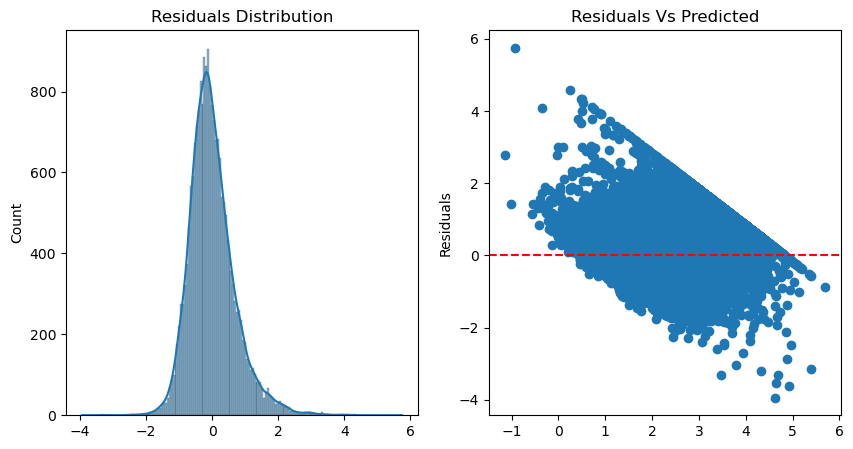

Model Coefficients const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [233]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(residuals , kde= True)
plt.title( 'Residuals Distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(X),residuals)
plt.axhline(y = 0, color ='red', linestyle = '--')
plt.title( 'Residuals Vs Predicted')
plt.ylabel('Residuals')
plt.show()

print('Model Coefficients' , model.params)

In [235]:
from sklearn.metrics import mean_squared_error,r2_score

In [237]:
predictions = model.predict(X)
print("R squared Score : " ,r2_score(y,predictions))
print('MSE :' ,mean_squared_error(y,predictions))

R squared Score :  0.617696810976802
MSE : 0.49001892235770017
